# Basic Process
##  Basic operations on images

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Accessing and modifying pixel values

In [5]:
img = cv2.imread('inputs/messi5.jpg')
px = img[100, 100]
print(px)  # [157 166 200]

blue = img[100, 100, 0]  # opencv's color order is BGR
print(blue)  # 157

img[100, 100] = [255, 255, 255]  
print(img[100, 100])  # [255 255 255]

print(img.item(10, 10, 2))  # 59

img.itemset((10, 10, 2), 100)
print(img.item(10, 10, 2))  # 100

[157 166 200]
157
[255 255 255]
59
100


Caution: Numpy is a library optimized for fast array computations. The process of acquiring and changing pixel values for each pixel is not recommended because of the processing time involved.

### Accessing image property

In [7]:
print(img.shape)  # (342, 548, 3)
print(img.size)  # 562248
print(img.dtype)  # uint8

(342, 548, 3)
562248
uint8


`img.shape` is a good way to confirm whether the image is color or grayscale.

### Image ROI

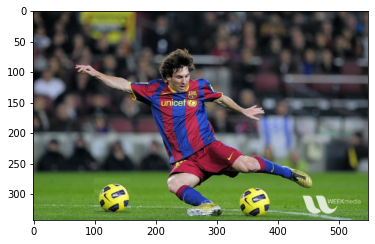

In [12]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(out)
plt.show()

### Splitting and merging image channels

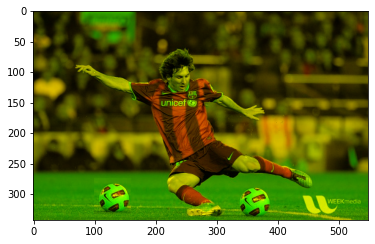

In [14]:
blue, green, red = cv2.split(img)  # processing with high computational cost
img = cv2.merge((blue, green, red))

blue = img[:, :, 0]  # extract one color component
img[:, :, 2] = 0  # red channel is changed to 0
plt.imshow(img)
plt.show()

### Making  borders for a image

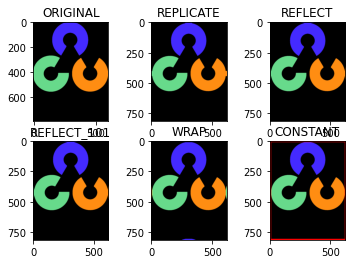

In [24]:
BLUE = [255, 0, 0]

img1 = cv2.imread('inputs/opencv-logo.png')
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

replicate = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REPLICATE)  # aaaaa |abcdefgh| hhhhh
reflect = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT)  # edcba |abcdefgh| hgfed
reflect101 = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)  # fedcb |abcdefgh| gfedc
wrap = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_WRAP)  # dfegh |abcdefgh| abcde
constant = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=BLUE)  # xxxxx |abcdefgh| xxxxx

plt.subplot(2, 3, 1)
plt.imshow(img1, 'gray')
plt.title('ORIGINAL')
plt.subplot(2, 3, 2)
plt.imshow(replicate, 'gray')
plt.title('REPLICATE')
plt.subplot(2, 3, 3)
plt.imshow(reflect, 'gray')
plt.title('REFLECT')
plt.subplot(2, 3, 4)
plt.imshow(reflect101, 'gray')
plt.title('REFLECT_101')
plt.subplot(2, 3, 5)
plt.imshow(wrap, 'gray')
plt.title('WRAP')
plt.subplot(2, 3, 6)
plt.imshow(constant, 'gray')
plt.title('CONSTANT')

plt.show()

## Arithmetic operations on images
### Image addition

In [9]:
x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x, y))  # [[255]]  
print(x + y)  #  [4]  

[[255]]
[4]


`cv2.add` is saturated operation while numpy addition is modulo operation

### Image Blending

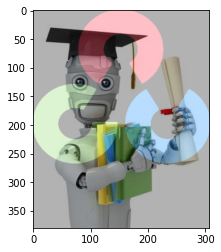

In [16]:
img1 = cv2.imread('inputs/ml.png')
img2 = cv2.imread('inputs/opencv-logo.png')

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.show()

`cv2.addWeighted(src1, alpha, src2, beta, gamma)` process like this:
```
    dst = alpha * src1 + beta * src2 + gamma
```

### Bitwise operation

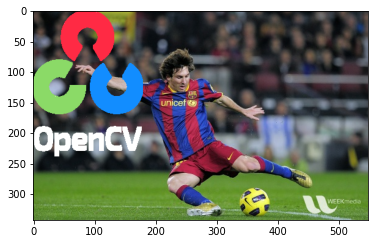

In [48]:
img1 = cv2.imread('inputs/messi5.jpg')
img2 = cv2.imread('inputs/opencv-logo-white.png')

rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)  # convert area corresponds to logo to 0
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)  # extract logo color

dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

`cv2.threshold(src, threshold, maxVal, thresholdType)` returns threshold and processed image.  
`cv2.THRESH_BINARY` binarize the image, pixels whose value under "threshold" is converted to 0 and upper is to "maxVal".

### Assignment

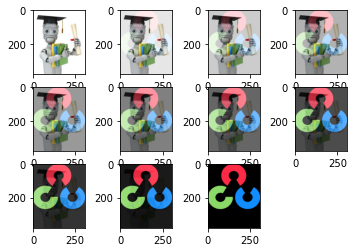

In [50]:
img1 = cv2.imread('inputs/ml.png')
img2 = cv2.imread('inputs/opencv-logo.png')

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

for i in range(11):
    dst = cv2.addWeighted(img1, 1 - 0.1 * i, img2, 0.1 * i, 0)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 4, i+1)
    plt.imshow(dst)

plt.show()

## Perfomance measurement and improvement methods
### Measuring performance with OpenCV

In [52]:
e1 = cv2.getTickCount()
# code execution
e2 = cv2.getTickCount()
time = (e2 - e1) / cv2.getTickFrequency()

You can get the number of clock-cycles by `cv2.getTickCount()`. It can be covert to second dividing by `cv2.getTickFrequency()`.

For example:

In [55]:
img1 = cv2.imread('inputs/messi5.jpg')

e1 = cv2.getTickCount()
for i in range(5, 49, 2):
    img1 = cv2.medianBlur(img1, i)
e2 = cv2.getTickCount()
t = (e2 - e1) / cv2.getTickFrequency()
print(t)

0.310730558


### Default optimization in OpenCV

In [59]:
import timeit
cv2.useOptimized()

True

In [58]:
%timeit res = cv2.medianBlur(img1, 49)

11 ms ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
cv2.setUseOptimized(False)
cv2.useOptimized()

False

In [61]:
%timeit res = cv2.medianBlur(img1, 49)

12.4 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
cv2.setUseOptimized(True)
x = 5

In [63]:
%timeit y = x**2

265 ns ± 3.21 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [64]:
%timeit y = x * x

45.8 ns ± 0.257 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [65]:
z = np.uint8([5])

In [66]:
%timeit y = z * z

475 ns ± 5.38 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [67]:
%timeit y = np.square(z)

449 ns ± 5.09 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


The process `y = x * x` is fastest. Numpy should be used when the size of array is large.

In [76]:
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [77]:
%timeit z = cv2.countNonZero(img)

17.6 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [78]:
%timeit z = np.count_nonzero(img)

8.82 µs ± 36.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Performance optimization techniques

1. Avoid using loops.
1. Vectorize the algorithm and code.
1. Use cache coherence.
1. Don't make copy of an array. 